# **QURAN EDA AND ANALYSIS REPORT**

### Setup & Load

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#Read csv
df = pd.read_csv("fullQuran_with_sajda.csv")

### Correcting the Sajda column error

In [90]:
# add correct sajda info
sajda_ayahs = [
    (7,206), (13,15), (16,50), (17,109), (19,58), (22,18), (22,77),
    (25,60), (27,26), (32,15), (38,24), (41,38), (53,62), (84,21), (96,19)
]

df['sajda_fix'] = df.apply(
    lambda x: (x['surah_num'], x['ayah_num_in_surah']) in sajda_ayahs,
    axis=1
)
# df.to_csv("fullQuran_with_sajda.csv", index=False)

In [91]:
df['sajda_fix'].unique()

array([False,  True])

### Understanding the Dataset Structure

In [ ]:
# Peek
print(df.head(3))
print("|-------|" * 6,"\n\n")
df.info()

   surah_num         surah_name_ar surah_name_en surah_eng_translation  \
0          1  سُورَةُ ٱلْفَاتِحَةِ    Al-Faatiha           The Opening   
1          1  سُورَةُ ٱلْفَاتِحَةِ    Al-Faatiha           The Opening   
2          1  سُورَةُ ٱلْفَاتِحَةِ    Al-Faatiha           The Opening   

  revelation_type  ayah_global_num  ayah_num_in_surah  \
0          Meccan                1                  1   
1          Meccan                2                  2   
2          Meccan                3                  3   

                              ayah_text_ar  \
0  ﻿بِسْمِ ٱللَّهِ ٱلرَّحْمَٰنِ ٱلرَّحِيمِ   
1    ٱلْحَمْدُ لِلَّهِ رَبِّ ٱلْعَٰلَمِينَ   
2                  ٱلرَّحْمَٰنِ ٱلرَّحِيمِ   

                                        ayah_text_en  juz  manzil  page  ruku  \
0  In the name of God, The Most Gracious, The Dis...    1       1     1     1   
1  All praise is due to God alone, the Sustainer ...    1       1     1     1   
2         The Most Gracious, the Dispenser of 

In [ ]:
print(df.describe())
print("|-------|" * 6,"\n")
df.shape

         surah_num  ayah_global_num  ayah_num_in_surah          juz  \
count  6236.000000      6236.000000        6236.000000  6236.000000   
mean     33.519724      3118.500000          53.506575    18.478833   
std      26.461261      1800.322471          50.463924     8.610080   
min       1.000000         1.000000           1.000000     1.000000   
25%      11.000000      1559.750000          16.000000    12.000000   
50%      26.000000      3118.500000          38.000000    19.000000   
75%      51.000000      4677.250000          75.000000    26.000000   
max     114.000000      6236.000000         286.000000    30.000000   

            manzil         page         ruku  hizb_quarter  
count  6236.000000  6236.000000  6236.000000   6236.000000  
mean      4.528544   360.991501   313.199487    144.282232  
std       2.057783   172.447777   155.390464     68.975408  
min       1.000000     1.000000     1.000000      1.000000  
25%       3.000000   231.000000   190.000000     93.000

(6236, 15)

In [ ]:
print("Null  Values: \n", df.isnull().sum())
print("|-------|" * 6,"\n\n")
print("Column Names: \n", df.columns.tolist())
print("|-------|" * 6,"\n\n")
print("Data Types: \n", df.dtypes)

Null  Values: 
 surah_num                0
surah_name_ar            0
surah_name_en            0
surah_eng_translation    0
revelation_type          0
ayah_global_num          0
ayah_num_in_surah        0
ayah_text_ar             0
ayah_text_en             0
juz                      0
manzil                   0
page                     0
ruku                     0
hizb_quarter             0
sajda                    0
dtype: int64
|-------||-------||-------||-------||-------||-------| 


Column Names: 
 ['surah_num', 'surah_name_ar', 'surah_name_en', 'surah_eng_translation', 'revelation_type', 'ayah_global_num', 'ayah_num_in_surah', 'ayah_text_ar', 'ayah_text_en', 'juz', 'manzil', 'page', 'ruku', 'hizb_quarter', 'sajda']
|-------||-------||-------||-------||-------||-------| 


Data Types: 
 surah_num                 int64
surah_name_ar            object
surah_name_en            object
surah_eng_translation    object
revelation_type          object
ayah_global_num           int64
ayah_n

### Basic Cleaning

In [ ]:
# Convert boolean-like column
df['sajda'] = df['sajda'].astype(str).str.upper().isin(['TRUE','1','YES'])

# Quick checks
print("Total verses in Quran: ", len(df))
print("|-------|" * 6,"\n")
print("Unique Surah's in Quran: ", df['surah_num'].nunique())

Total verses in Quran:  6236
|-------||-------||-------||-------||-------||-------| 

Unique Surah's in Quran:  114


### Surah-level Aggregations (Stats Summary)

In [ ]:
# Group by surah
surah_stats = (
    df.groupby(
        ['surah_num','surah_name_en','revelation_type'],
        as_index=False
    )
    .agg(
        total_ayah=('ayah_num_in_surah','max'),
        total_sajda=('sajda_fix','sum')
    )
)
surah_stats.head(7)


,surah_num,surah_name_en,revelation_type,total_ayah,total_sajda
0,1,Al-Faatiha,Meccan,7,0
1,2,Al-Baqara,Medinan,286,0
2,3,Aal-i-Imraan,Medinan,200,0
3,4,An-Nisaa,Medinan,176,0
4,5,Al-Maaida,Medinan,120,0
5,6,Al-An'aam,Meccan,165,0
6,7,Al-A'raaf,Meccan,206,1


### Surah with Most/Least Ayah

In [ ]:
max_ayah = surah_stats.loc[surah_stats['total_ayah'].idxmax()]
min_ayah = surah_stats.loc[surah_stats['total_ayah'].idxmin()]
print("Longest surah of Quran: ", max_ayah.surah_name_en, max_ayah.total_ayah)
print("|-------|" * 6,"\n")
print("Shortest surah of Quran: ", min_ayah.surah_name_en, min_ayah.total_ayah)

Longest surah of Quran:  Al-Baqara 286
|-------||-------||-------||-------||-------||-------| 

Shortest surah of Quran:  Al-Asr 3


### Surah with Most Sajda

In [ ]:
most_sajda = surah_stats.loc[surah_stats['total_sajda'].idxmax()]
print("Most Sajda containing Surah of Quran :\n\n", "Surah name: ",
     most_sajda.surah_name_en, ", count :", most_sajda.total_sajda)
print("|-------|" * 6,"\n")
print("Surah's having more than 1 Sajda :\n\n", 
      surah_stats.query("total_sajda > 1")[['surah_name_en','total_sajda']])

Most Sajda containing Surah of Quran :

 Surah name:  Al-Hajj , count : 2
|-------||-------||-------||-------||-------||-------| 

Surah's having more than 1 Sajda :

    surah_name_en  total_sajda
21       Al-Hajj            2


### Makki vs Madni Counts

In [ ]:
df['revelation_type'].value_counts()
surah_stats['revelation_type'].value_counts()

revelation_type
Meccan     86
Medinan    28
Name: count, dtype: int64

## Visual Exploration

###  Distribution of Ayah per Surah

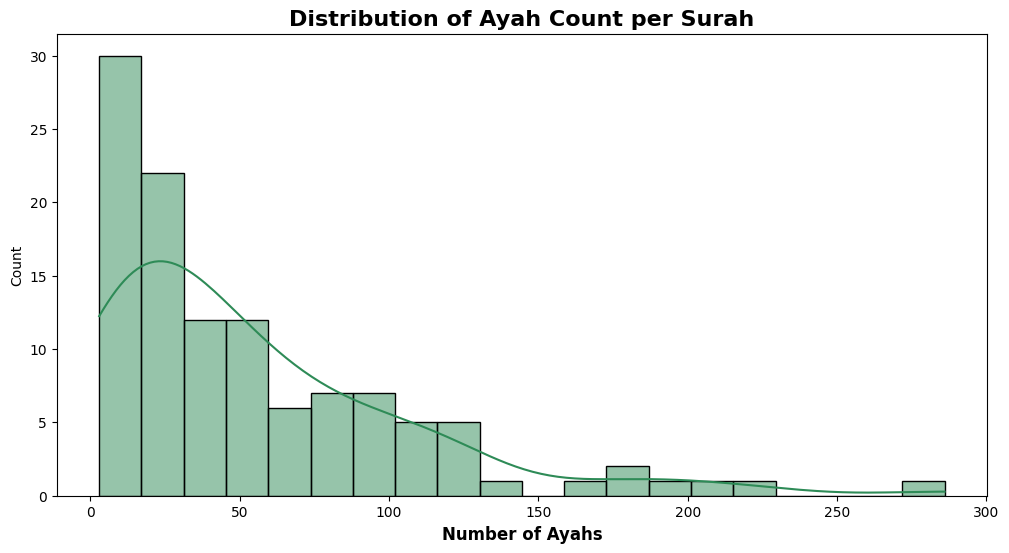

In [98]:
plt.figure(figsize=(12,6))
sns.histplot(surah_stats['total_ayah'], bins=20, kde=True, color= 'seagreen')
plt.title("Distribution of Ayah Count per Surah", fontsize=16, fontweight='bold')
plt.xlabel("Number of Ayahs", fontsize=12, fontweight='bold')
plt.show()

### Makki vs Madni Boxplot

C:\Users\PMLS\AppData\Local\Temp\ipykernel_18012\2969827606.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='revelation_type', y='total_ayah', data=surah_stats, palette='cividis')


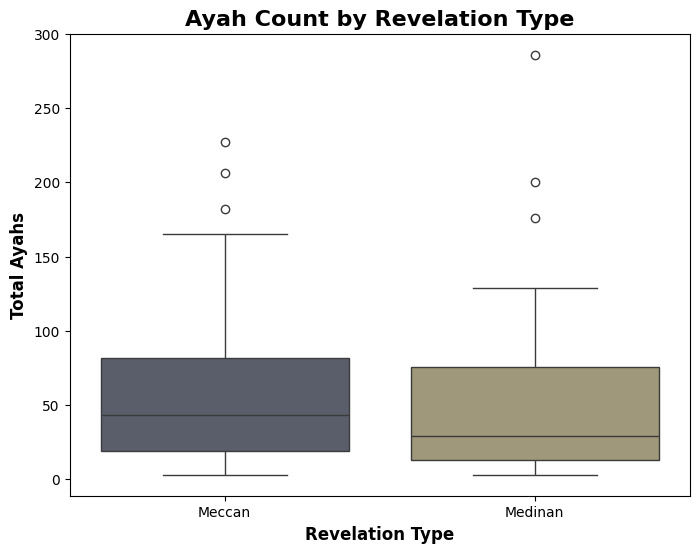

In [103]:
plt.figure(figsize=(8,6))
sns.boxplot(x='revelation_type', y='total_ayah', data=surah_stats, palette='cividis')
plt.title("Ayah Count by Revelation Type", fontsize=16, fontweight='bold')
plt.xlabel("Revelation Type", fontsize=12, fontweight='bold')
plt.ylabel("Total Ayahs", fontsize=12, fontweight='bold')
plt.show()


### Top 10 Surahs by Length

C:\Users\PMLS\AppData\Local\Temp\ipykernel_18012\3972927709.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='surah_name_en', x='total_ayah', data=top10, palette='viridis')


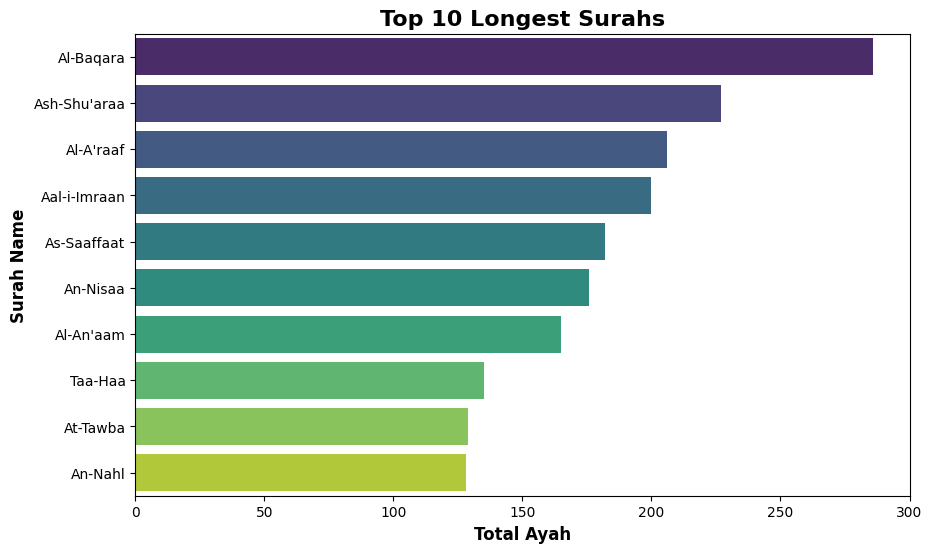

In [104]:
top10 = surah_stats.nlargest(10,'total_ayah')
plt.figure(figsize=(10,6))
sns.barplot(y='surah_name_en', x='total_ayah', data=top10, palette='viridis')
plt.title("Top 10 Longest Surahs", fontsize=16, fontweight='bold')
plt.xlabel("Total Ayah", fontsize=12, fontweight='bold')
plt.ylabel("Surah Name", fontsize=12, fontweight='bold')
plt.show()

### Sajda Count Stem Plot

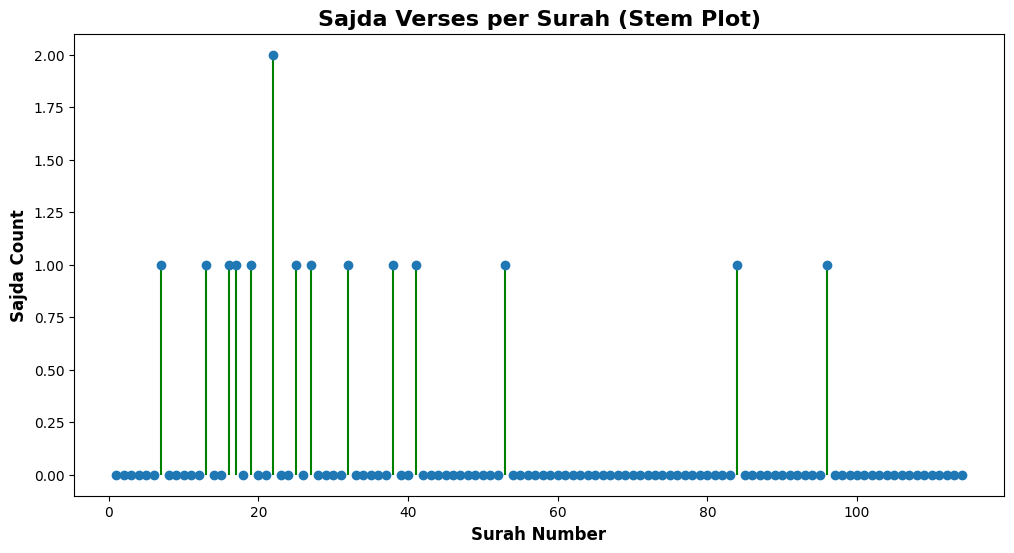

In [105]:
plt.figure(figsize=(12,6))
markerline, stemlines, baseline = plt.stem(
    surah_stats['surah_num'], surah_stats['total_sajda'], basefmt=" ")
plt.setp(stemlines, 'color','green')
plt.title("Sajda Verses per Surah (Stem Plot)", fontsize=16, fontweight='bold')
plt.xlabel("Surah Number", fontsize=12, fontweight='bold')
plt.ylabel("Sajda Count", fontsize=12, fontweight='bold')
plt.show()

### Pair Plot for Surah

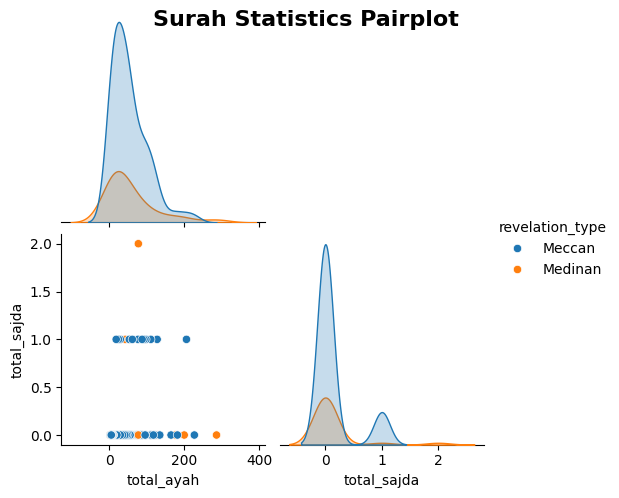

In [108]:
sns.pairplot(
    surah_stats,
    vars=['total_ayah','total_sajda'],
    hue='revelation_type',
    corner=True
)
plt.suptitle("Surah Statistics Pairplot", fontsize=16, fontweight='bold')
plt.show()

### Violin Plot for Surah

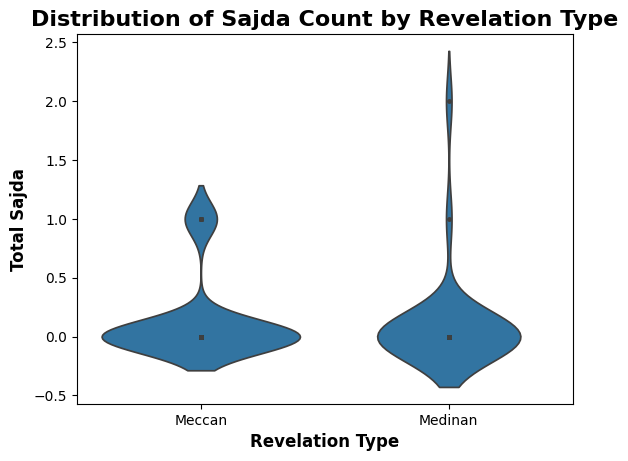

In [110]:
sns.violinplot(
    x='revelation_type',
    y='total_sajda',
    data=surah_stats,
    inner='point'
)
plt.title("Distribution of Sajda Count by Revelation Type", fontsize=16, fontweight='bold')
plt.xlabel("Revelation Type", fontsize=12, fontweight='bold')
plt.ylabel("Total Sajda", fontsize=12, fontweight='bold')
plt.show()

### Aesthetic Surah's name 'Word Cloud'

In [ ]:
# importance measure = number of ayah per surah
surah_freq = df.groupby("surah_name_en")["ayah_num_in_surah"].count().to_dict()

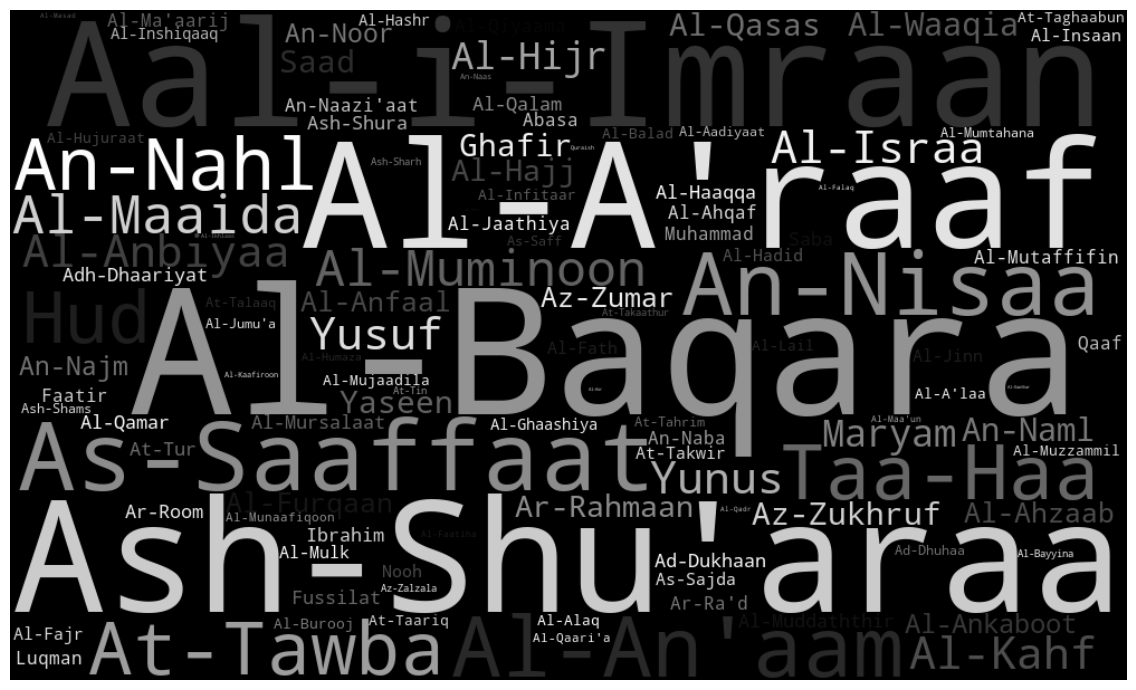

In [ ]:
wc = WordCloud(
        width=1000, height=600,
        background_color="black",
        colormap="Greys",          # greyscale to white
        prefer_horizontal=1.0,     # keep names mostly horizontal
        max_words=len(surah_freq), # include all surahs
        contour_width=1, contour_color="white"
)

wc.generate_from_frequencies(surah_freq)

plt.figure(figsize=(14,7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()
 # Save word cloud image
wc.to_file("surah_wordcloud.png")

In [ ]:
print(type(top_surahs))
print(list(top_surahs.items())[:5])

<class 'dict'>
[('Al-Baqara', 286), ("Ash-Shu'araa", 227), ("Al-A'raaf", 206), ('Aal-i-Imraan', 200), ('As-Saaffaat', 182)]
